In [70]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
dataset_11=pd.read_csv("/Users/mymac/Desktop/untitled folder/QVI_data.csv")
dataset_22=pd.read_csv("/Users/mymac/Desktop/untitled folder/QVI_purchase_behaviour.csv")
dataset_33=pd.read_csv("/Users/mymac/Desktop/untitled folder/QVI_transaction_data.csv")


dataset_1=dataset_11.copy()
dataset_2=dataset_22.copy()
dataset_3=dataset_33.copy()

def split_prod_name(name):
    name = str(name)
    match = re.search(r'\d.*', name)
    if match:
        index = match.start()
        return pd.Series([
            name[:index].strip(),     # text before the number
            name[index:].strip()      # number and unit
        ])
    else:
        return pd.Series([name.strip(), None])

    


dataset_1[['PRODUCT_NAME_CLEAN','PRODUCT_SIZE']]=dataset_1['PROD_NAME'].apply(split_prod_name)
print(dataset_1[['PRODUCT_NAME_CLEAN', 'PRODUCT_SIZE']].head())



                   PRODUCT_NAME_CLEAN PRODUCT_SIZE
0  Natural Chip        Compny SeaSalt         175g
1    Red Rock Deli Chikn&Garlic Aioli         150g
2    Grain Waves Sour    Cream&Chives         210G
3  Natural ChipCo      Hony Soy Chckn         175g
4           WW Original Stacked Chips         160g


In [71]:
dataset_1.isna().sum()

LYLTY_CARD_NBR        0
DATE                  0
STORE_NBR             0
TXN_ID                0
PROD_NBR              0
PROD_NAME             0
PROD_QTY              0
TOT_SALES             0
PACK_SIZE             0
BRAND                 0
LIFESTAGE             0
PREMIUM_CUSTOMER      0
PRODUCT_NAME_CLEAN    0
PRODUCT_SIZE          0
dtype: int64

In [72]:

dataset_1.columns = dataset_1.columns.str.strip()
dataset_1["PROD_NAME"] = dataset_1["PROD_NAME"].astype(str)
dataset_1["ITEM_SIZE"] = dataset_1['PROD_NAME'].str.count('&')+1

dataset_1["ITEM_SIZE"].head()

0    1
1    2
2    2
3    1
4    1
Name: ITEM_SIZE, dtype: int64

In [73]:
dataset_1.drop(columns=['PRODUCT_SIZE', 'PROD_NAME'], inplace=True, errors='ignore')


In [74]:
dataset_1['TOT_QUANTITY']=dataset_1['ITEM_SIZE']*dataset_1['PROD_QTY']

In [75]:
dataset_1.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,PRODUCT_NAME_CLEAN,ITEM_SIZE,TOT_QUANTITY
0,1000,2018-10-17,1,1,5,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,Natural Chip Compny SeaSalt,1,2
1,1002,2018-09-16,1,2,58,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,Red Rock Deli Chikn&Garlic Aioli,2,2
2,1003,2019-03-07,1,3,52,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,Grain Waves Sour Cream&Chives,2,2
3,1003,2019-03-08,1,4,106,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,Natural ChipCo Hony Soy Chckn,1,1
4,1004,2018-11-02,1,5,96,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,WW Original Stacked Chips,1,1


In [76]:
dataset_1.describe()

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE,ITEM_SIZE,TOT_QUANTITY
count,2.648340e+05,264834.000000,2.648340e+05,264834.000000,264834.000000,264834.000000,264834.000000,264834.000000,264834.000000
mean,1.355488e+05,135.079423,1.351576e+05,56.583554,1.905813,7.299346,182.425512,1.310549,2.497413
std,8.057990e+04,76.784063,7.813292e+04,32.826444,0.343436,2.527241,64.325148,0.462719,1.001871
min,1.000000e+03,1.000000,1.000000e+00,1.000000,1.000000,1.500000,70.000000,1.000000,1.000000
25%,7.002100e+04,70.000000,6.760050e+04,28.000000,2.000000,5.400000,150.000000,1.000000,2.000000
50%,1.303570e+05,130.000000,1.351365e+05,56.000000,2.000000,7.400000,170.000000,1.000000,2.000000
75%,2.030940e+05,203.000000,2.026998e+05,85.000000,2.000000,9.200000,175.000000,2.000000,4.000000
max,2.373711e+06,272.000000,2.415841e+06,114.000000,5.000000,29.500000,380.000000,2.000000,10.000000


In [78]:
dataset_1['DATE'] = pd.to_datetime(dataset_1['DATE'], format='%Y-%m-%d')
print(dataset_1['DATE'].dtype)

datetime64[ns]


In [79]:
dataset_1['PRODUCT_NAME_CLEAN'].unique()
dataset_1['PRODUCT_NAME_CLEAN'].str.replace('&',' ',regex=False)
words=pd.Series(' '.join(dataset_1['PRODUCT_NAME_CLEAN']).split()).value_counts()

word_count=words.reset_index()
word_count.columns = ['Word','Frequency']
word_count.to_csv('./word_frequencies.csv', index=False)

with pd.option_context('display.max_rows',None):
    display(words)

Chips                 49770
Kettle                41288
&                     35565
Smiths                28860
Cheese                27890
Pringles              25102
Doritos               24962
Salt                  24719
Crinkle               23960
Corn                  22061
Original              21560
Cut                   20754
Chip                  18645
Chicken               18577
Salsa                 18094
Thins                 14075
Sour                  13882
Crisps                12607
Vinegar               12402
Chilli                12389
RRD                   11894
Infuzions             11057
Supreme               10961
Sea                   10888
WW                    10320
Popd                   9693
Cobs                   9693
Tortilla               9580
Tostitos               9471
Twisties               9454
Sensations             9429
El                     9324
Dip                    9324
Old                    9324
Paso                   9324
Sweet               

In [85]:
dataset_1.to_csv("./final_df.csv",index=False)
dataset_final=pd.read_csv("./final_df.csv")

/var/folders/md/mz_j9gv95wl7ccgbk9q7k_h40000gn/T/ipykernel_2020/3308419735.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.index, y=brand_counts.values, palette="muted")


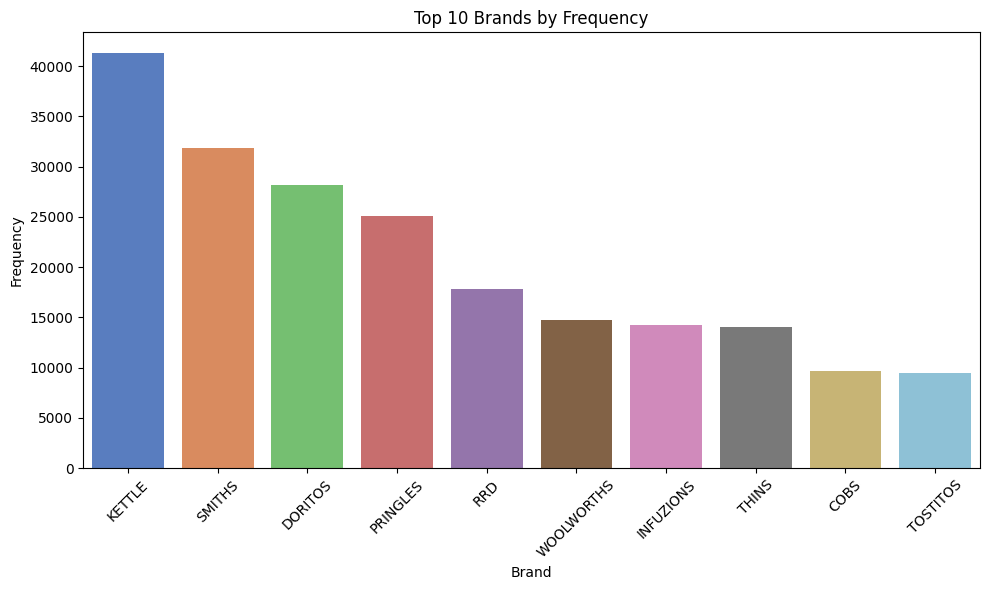

In [86]:
plt.figure(figsize=(10, 6))
brand_counts = dataset_final["BRAND"].value_counts().nlargest(10)
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette="muted")
plt.title("Top 10 Brands by Frequency")
plt.xlabel("Brand")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


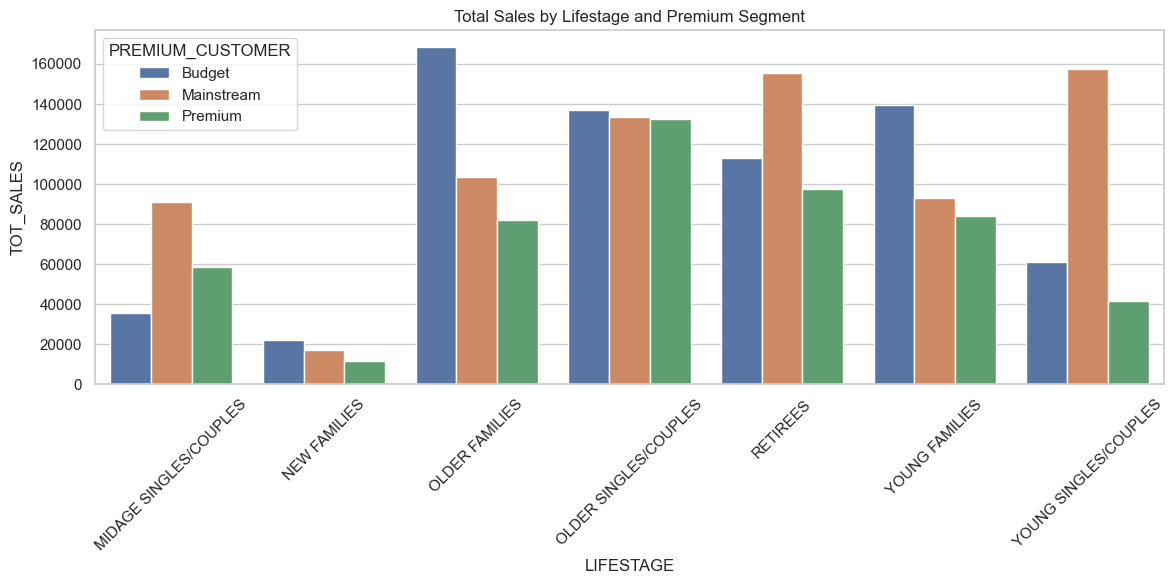

In [92]:
joined_df=pd.merge(dataset_3, dataset_2, on='LYLTY_CARD_NBR', how='left')
joined_df['DATE'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(joined_df['DATE'], unit='D')


sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sales_by_segment = joined_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
sns.barplot(data=sales_by_segment, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER')
plt.title('Total Sales by Lifestage and Premium Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



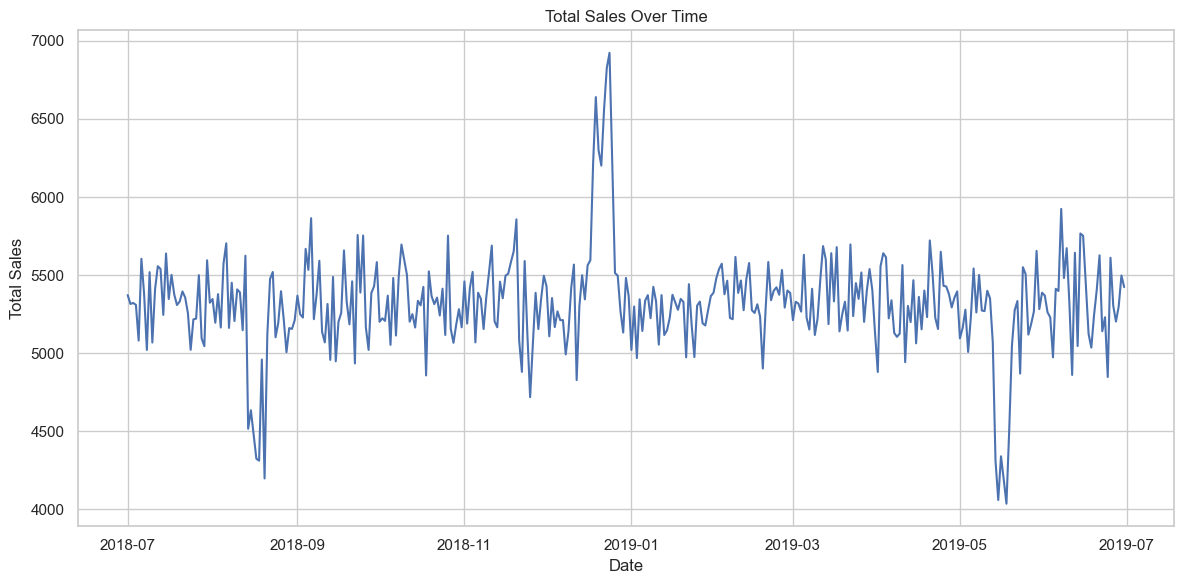

In [93]:
plt.figure(figsize=(12, 6))
sales_trend = joined_df.groupby('DATE')['TOT_SALES'].sum().reset_index()
sns.lineplot(data=sales_trend, x='DATE', y='TOT_SALES')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()